In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

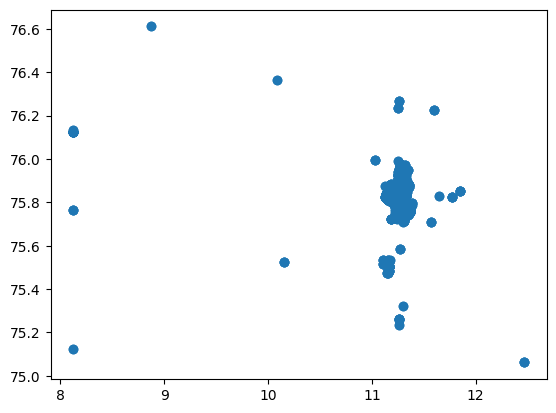

0       1.5
1       1.5
4       3.0
5       1.5
8       1.5
       ... 
5808    3.5
5809    1.5
5810    1.5
5813    1.0
5814    1.0
Name: accident_score, Length: 5362, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as pp
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('Data_Rapid_2019.csv')

data = data.dropna()

# Display the first few rows of the dataset
# data.head()

# Check the structure of the dataset
# data.info()

# Calculate the accident score


data['accident_score'] = (data['Death'] * 2) + (data['Grievous'] * 1.5) + (data['Minor'] * 0.5)

# We will work on improving this calculation and taking more features into consideration
data = data[data['accident_score'] != 0]


# Normalize the accident scores
# scaler = MinMaxScaler()
# data['accident_score_normalized'] = scaler.fit_transform(data[['accident_score']])*10

# Display the first few rows to check the new columns
# print(data.head())
# print(max(data['accident_score']))
# print(data[5815].lONGITUDE)
# print(data[5815].LATITUDE)

# val = 0. # this is the value where you want the data to appear on the y-axis.
# ar = np.arange(10) # just as an example array
pp.scatter(data['Latitude'],data['Longitude'])
pp.show()
# print(len(data['accident_score_normalized']))
x_di = data['accident_score']
print(x_di)



In [11]:
data.head()

,Subdivision,Circle,POLICE STATION,Accident type,Death,Grievous,Minor,Driver,Passenger,Pedestrian,Cyclist,Otherpersons,Motorised,Non Motorised,Longitude,Latitude,Trafic Violation,AS,accident_score
0,Kozhikode North,Med. College,Med. College,Grevious Injury,0,1,0,2,0,0,0,0,2,0,75.811820,11.264664,No Violation,1.0,1.5
1,Kozhikode North,Med. College,Med. College,Grevious Injury,0,1,0,2,0,0,0,0,2,0,75.811820,11.264664,Over Speeding,1.0,1.5
4,Kozhikode North,Chevayur,Chevayur,Grevious Injury,0,2,0,1,2,0,0,0,1,0,75.848068,11.335368,Over Speeding,2.0,3.0
5,Kozhikode South,Kasaba Kozhikode,Panniyankara,Grevious Injury,0,1,0,1,0,1,0,0,1,0,75.801592,11.214077,Over Speeding,1.0,1.5
8,Kozhikode South,Kasaba Kozhikode,Panniyankara,Grevious Injury,0,1,0,1,0,1,0,0,1,0,75.791298,11.226640,Over Speeding,1.0,1.5


In [15]:

# Train the algorithm on given data

# Separate features and target variable

# X = data[['Longitude', 'Latitude']]
# y = data['accident_score']



# # # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Create and train the kNN model


# # k = 77 # You can choose the number of neighbors , ideally it should be the square root of our total data set , but that was not working properly for us. We need to decide the optimum
# # # value for this


# # # def custom_function(arr):
# # #   weight = np.array( [3,3,3,3] )
# # #   # print(arr)
# # #   # for a in arr[0]:
# # #   #  weight =  np.append(weight, 1/(100*(a+0.00001)))

# # #   weight = weight.reshape(1,4)
# # #   # print(weight)
# # #   return weight


# # knn = KNeighborsRegressor(n_neighbors=k)
# # knn.fit(X_train, y_train)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import joblib

# Assuming you already have your dataset loaded in the 'data' DataFrame
# data = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = data[['Longitude', 'Latitude']]
y = data['accident_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the kNN model
k = 77  # Optimum number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Save the model to a file
joblib_file = "knn_model.pkl"
joblib.dump(knn, joblib_file)

['knn_model.pkl']

In [13]:
# Decode the polyline string and return array of lat long pair

def decode_polyline(encoded):
    if not encoded:
        return []

    poly = []
    index = 0
    lat = 0
    lng = 0

    while index < len(encoded):
        b = shift = result = 0

        while True:
            b = ord(encoded[index]) - 63
            index += 1
            result |= (b & 0x1f) << shift
            shift += 5
            if b < 0x20:
                break

        dlat = ~(result >> 1) if result & 1 else (result >> 1)
        lat += dlat

        shift = result = 0

        while True:
            b = ord(encoded[index]) - 63
            index += 1
            result |= (b & 0x1f) << shift
            shift += 5
            if b < 0x20:
                break

        dlng = ~(result >> 1) if result & 1 else (result >> 1)
        lng += dlng


        poly.append([lng/1e5,lat/1e5])

    return poly

In [14]:
# Calculate accident score for a give lat long point

def calculate_point_danger(longitude, latitude):
    # result = data[(data['Longitude'] == longitude) & (data['Latitude'] == latitude)]['accident_score']

    # if not result.empty:
    #     return result.iloc[0]

    dist,ind =  knn.kneighbors(np.array([[longitude, latitude]]))
    for i in range(1):
      print(dist[i]*(100000))

    ans=0;
    sz = len(dist[0])
    i=0;
    total_dist=0;
    while i<sz:
      di = x_di[ind[0][i]]
      # print(di)
      we = 1/(200*(dist[0][i] + 0.000000000001))    #200 is hyperpatameter
      # total_dist+=(1/(dist[0][i]+0.000000000001))
      if we>2:  #Hyperparameter
        we=2
      ans += di*we
      i+=1
    # print("ans = ",ans/(sz*total_dist))
    # return total_dist*ans/(sz)
    # print(ans/sz)
    return ans/sz;

calculate_point_danger(75.76926,11.283577)


# we have tried various things, Here we need to decide the some hyperparameter but we dont have any method to check the accuracy which parameters works best.


[  0.           0.           0.           0.           0.
 216.62005909 216.62005909 216.62005909 216.62005909 216.62005909
 216.89824803 216.89824803 216.89824803 293.63055018 293.63055018
 293.63055018 293.63055018 300.53768483 300.53768483 300.53768483
 305.71548865 305.71548865 305.71548865 305.71548865 305.71548865
 305.71548865 337.41004727 363.94127274 363.94127274 363.94127274
 391.48560638 391.48560638 391.48560638 391.48560638 412.77675564
 414.09826129 414.09826129 414.09826129 414.09826129 418.56633883
 418.56633883 442.3449898  442.3449898  442.3449898  459.70584073
 459.70584073 459.70584073 459.70584073 459.70584073 459.70584073
 474.73978135 474.73978135 474.73978135 483.62936222 508.52453235
 508.52453235 508.52453235 508.52453235 522.85541022 522.85541022
 545.12092236 545.12092236 568.61362101 568.61362101 568.61362101
 568.61362101 587.32427159 587.32427159 587.32427159 587.32427159
 587.32427159 632.91511279 632.91511279 633.37224442 633.37224442
 698.72733595 698.

/home/sumit/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


KeyError: 1303

In [ ]:
# Calculate the accident score for a path of lat long points

def calculate_path_danger(lat_long_pair_arr):

  sz = len(lat_long_pair_arr)
  total_di =0
  for a in lat_long_pair_arr:
    temp = calculate_point_danger(a[0],a[1])
    total_di+=temp
    # print(temp)

  return (total_di/sz)


# Here we are calculating danger index of path which is average of all lat long points

In [ ]:
# Testing

s = "_p~iF~ps|U_ulLnnqC_mqNvxq`@"

str = "i_vcAc_rmMl[wCzOa]lp@{K~RqV~IqHzO?|QjDtLlE"
path = decode_polyline(str)
# print(path)

lat = 11.283577
lang = 75.76926

danger_index = calculate_point_danger(lang,lat)
print(danger_index)

# danger_index_path = calculate_path_danger(path)
# print(danger_index_path)


[[0.]] [[2236]]
3.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
